# Decision Tree
* Decision Tree : Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.



### Objectives
* Basics of Decision Tree
* Introduction to Decision Boundry
* Decision Tree for Classification
* Introduction to Entropy

In [55]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

In [20]:
X,Y = make_blobs(n_features = 2, n_samples = 1000 ,cluster_std = .8 ,centers =4,random_state=6)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

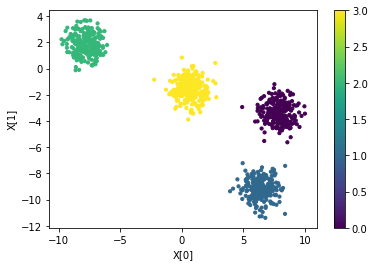

In [22]:
plt.scatter(X[:,0],X[:,1],s = 10, c = Y)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()

### Fundamentals of decision tree
* Supervised Algorithm - For Classification & regression
* DT algorithm generates a decison tree for prediction
* Leafs are the decisons
* DT don't work directly on continues feature data
* DT translates continues data into categorical data
* DT creation can be based on entropy or gini (TBD tom)

In [23]:
X[:5]

array([[ 9.25784958, -2.82526517],
       [ 0.96889603, -1.63014501],
       [-8.2630645 ,  0.90588073],
       [-7.85737757,  2.17665695],
       [-8.28000833,  1.98407695]])

In [24]:
Y[:5]

array([0, 3, 2, 2, 2])

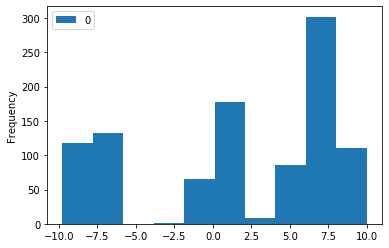

In [27]:
pd.DataFrame(X[:,0]).plot.hist()

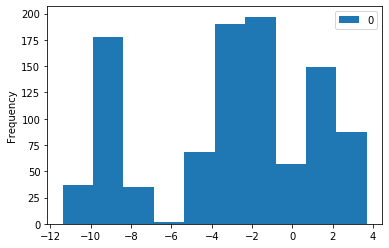

In [28]:
pd.DataFrame(X[:,1]).plot.hist()

In [38]:
df  = pd.DataFrame({'X1':X[:,0],'X2':X[:,1]})

In [39]:
df['Target'] = Y

In [40]:
df.sample(10)

,X1,X2,Target
599,5.378068,-8.866418,1
393,-6.909339,0.570274,2
586,-0.358492,-1.143097,3
833,8.491634,-2.656765,0
282,6.320836,-9.825393,1
458,6.280000,-8.861211,1
606,5.518441,-9.910480,1
202,6.092112,-9.105714,1
881,0.976366,-1.988373,3
684,6.291129,-9.333665,1


### Converting X1 col to categorical column

In [43]:
def f(v):
    if v < -7:
        return  "One"  
    elif v < 2.5:
        return "Two"
    else:
        return "Three"
df['X1_cat'] = df.X1.map(f)

In [44]:
def f(v):
    if v < -4:
        return "One"
    elif v < -1:
        return "Two"
    else:
        return "Three"
df['X2_cat'] = df.X2.map(f)

In [45]:
df.sample(10)

,X1,X2,Target,X1_cat,X2_cat
80,-0.059812,-1.073739,3,Two,Two
447,-6.672008,1.734805,2,Two,Three
139,0.791710,-0.699895,3,Two,Three
176,6.815109,-10.521920,1,Three,One
372,-7.843537,3.173187,2,One,Three
292,1.291136,-0.852129,3,Two,Three
274,1.501300,-3.325314,3,Two,Two
941,0.894310,-0.593954,3,Two,Three
263,8.543001,-2.605925,0,Three,Two
275,1.963128,-1.316881,3,Two,Two


In [48]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [51]:
dt = DecisionTreeClassifier(criterion='entropy')

In [53]:
dt.fit(df[['X1','X2']],df.Target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
export_graphviz(dt,'dt.tree')

In [56]:
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

In [72]:
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])

In [73]:
outcome

array([2, 2, 2, ..., 0, 0, 0])

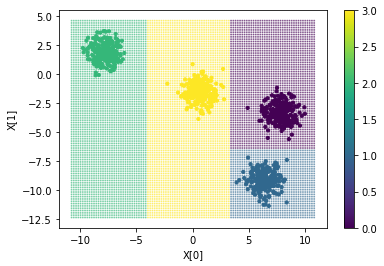

In [75]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
#0 - purple
#1 - blue
#2 - Green
#3 - Yellow
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,alpha=.5,s=.9)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knc = KNeighborsClassifier()

In [78]:
knc.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
outcome = knc.predict(np.c_[xx.ravel(),yy.ravel()])

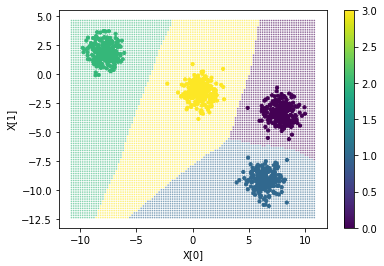

In [80]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
#0 - purple
#1 - blue
#2 - Green
#3 - Yellow
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,alpha=.5,s=.5)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression()

In [83]:
lr.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
outcome = lr.predict(np.c_[xx.ravel(),yy.ravel()])

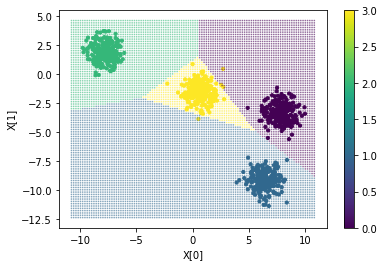

In [86]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
#0 - purple
#1 - blue
#2 - Green
#3 - Yellow
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,alpha=.5,s=.5)

In [87]:
from sklearn.datasets import load_digits

In [88]:
digits = load_digits()

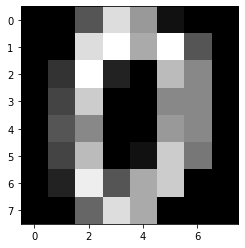

In [89]:
plt.imshow(digits.images[0],cmap='gray')

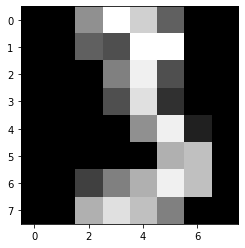

In [90]:
plt.imshow(digits.images[45],cmap='gray')

In [92]:
digits.target[45]

3

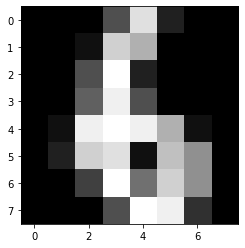

In [93]:
plt.imshow(digits.images[34],cmap='gray')

In [94]:
digits.target[34]

6

* Training data for scikit is always in vector format & not matrix format
* digits.images is in matrix format
* digits.data is the row version of matrix, this scikit understands
* Each pixel is one feature

In [95]:
from sklearn.model_selection import train_test_split

In [103]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [104]:
dt = DecisionTreeClassifier()

In [105]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [107]:
export_graphviz(dt,'dt2.tree')

* To see the generated tree http://www.webgraphviz.com/

In [108]:
dt.score(testX,testY)

0.82

### Another Example

In [109]:
tennis_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/tennis.csv.txt')

In [110]:
tennis_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [111]:
from sklearn.preprocessing import OrdinalEncoder

In [112]:
oe = OrdinalEncoder()

In [114]:
feature = oe.fit_transform(tennis_data.drop(columns = ['play']))

In [115]:
dt = DecisionTreeClassifier(criterion='entropy')

In [116]:
dt.fit(feature,tennis_data.play)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [117]:
oe.categories_

[array(['overcast', 'rainy', 'sunny'], dtype=object),
 array(['cool', 'hot', 'mild'], dtype=object),
 array(['high', 'normal'], dtype=object),
 array([False,  True])]

In [119]:
feature#[2., 1., 0., 0.]

array([[2., 1., 0., 0.],
       [2., 1., 0., 1.],
       [0., 1., 0., 0.],
       [1., 2., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [0., 0., 1., 1.],
       [2., 2., 0., 0.],
       [2., 0., 1., 0.],
       [1., 2., 1., 0.],
       [2., 2., 1., 1.],
       [0., 2., 0., 1.],
       [0., 1., 1., 0.],
       [1., 2., 0., 1.]])

In [120]:
export_graphviz(dt,'dt3.tree',feature_names=['outlook','temp','humidity','windy'])

In [121]:
tennis_data.play

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

* predict the outcome -
* ['outlook','temp','humidity','windy']
* [1., 0., 1., 1.]


In [123]:
dt.predict([[1,0,1,0]])

array(['yes'], dtype=object)

In [124]:
dt.predict([[1,0,1,1]])

array(['no'], dtype=object)

### Note :
* Decision Trees are highly interpretable, what this means is - you can explain anybody why your model took the decision
* This is known as model interpretation

### Reading Assignments
* Read about basic probability
* Read about entropy
* Read about information gain